# 2-1. 전체 데이터 준비


In [2]:
# 사과 20개 + 체리 14개 = 총 34개 데이터
fruit_diameter = [7.2, 7.3, 7.5, 7.5, 7.6, 7.8, 7.8, 7.9,
                  8.0, 8.0, 8.1, 8.2, 8.2, 8.2, 8.3, 8.3,
                  8.4, 8.4, 8.5, 8.6,
                  1.4, 1.5, 1.5, 1.6, 1.6, 1.7, 1.7, 1.7,
                  1.8, 1.8, 1.9, 1.9, 2.0, 2.1]
fruit_weight = [140, 155, 170, 175, 185, 190, 200, 180,
                195, 200, 195, 200, 205, 200, 170, 210,
                210, 220, 225, 230,
                4, 5, 5, 6, 6, 7, 7, 6,
                8, 7, 8, 9, 10, 11]

fruit_data = [[d, w] for d, w in zip(fruit_diameter, fruit_weight)]
fruit_target = [1] * 20 + [0] * 14

# 2-2. (헛발질해보기) 순차적으로 잘라서 샘플링 편향 발생한 경우

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 훈련셋으로 입력값 중 0번쨰~20번째 인덱스까지 사용
train_input = fruit_data[:20]       ## 앞부분 20개(사과)만 학습
train_target = fruit_target[:20]    ## 뒷부분 14개(체리)로 시험
# 테스트셋으로 입력값 중 20번째~마지막 인덱스까지 사용
test_input = fruit_data[20:]
test_target = fruit_target[20:]

kn.fit(train_input, train_target) # 훈련하기
kn.score(test_input, test_target) # 훈련 결과 출력

0.0

- 데이터를 순서대로 잘라서 앞쪽 사과 데이터로만 공부를 시킴. 그리고 시험은 체리 데이터로만
- 당연히 모델은 사과밖에 모르니까 체리 시험에서 0점 받음. 이게 '샘플링 편향'

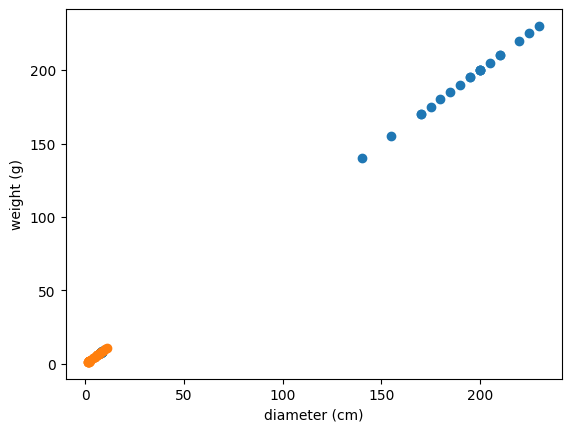

In [4]:
# 산점도로 확인해보기 -> 주황색(test set)은 다 체리쪽에 몰빵되어있고, 파란색(train set)은 다 사과쪽에 몰빵되어있다.
import matplotlib.pyplot as plt

plt.scatter(train_input, train_input)
plt.scatter(test_input, test_input)
plt.xlabel('diameter (cm)')
plt.ylabel('weight (g)')
plt.show()

# 2-3. 넘파이 연습 (배열로 바꾸고, 랜덤 섞어보기)

아까 봤던 샘플링 편향을 해결하기 위해 데이터를 골고루 섞어야 함.

In [5]:
import numpy as np

input_arr = np.array(fruit_data)
target_arr = np.array(fruit_target)
print(input_arr.shape)  # (34, 2)

np.random.seed(42)
index = np.arange(34)
print(index) # 랜덤하게 섞어지기전 [ 0  1  2  3  4  5  6  7  8  ... 31 32 33]
np.random.shuffle(index) # 인덱스 랜덤하게 섞기   / # 인덱스를 무작위로 섞음
print(index) # [15 19 27 26  8 24 21 12 32  9  0  4 16 17  5 13 11  1  2 30  3 29 23 31 22 18 25  6 20 33  7 10 14 28]


(34, 2)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[15 19 27 26  8 24 21 12 32  9  0  4 16 17  5 13 11  1  2 30  3 29 23 31
 22 18 25  6 20 33  7 10 14 28]


- 데이터의 순서를 무작위로 뒤섞어서 사과와 체리가 골고루 학습 세트와 테스트 세트에 들어가게 만드는 과정임

### 잠깐)) `np.random.seed(42)`는 뭐에여?

넘파이에서 무작위 결과를 만드는 함수들은 실행할때마다 다른 결과를 만듭니다. 일정한 결과를 얻으려면 초기에 random seed(랜덤시드)를 지정하면 됩니다.

- np.random.seed(42) : 무작위 번호 발생기의 '시작 번호'를 고정하는 것 (재현성 위해서) 
    - 내가 코드를 돌릴 때마다 섞이는 결과가 달라지면, 나중에 모델 성능이 변했을 때 진짜 코드를 잘 짰는지 우연찮게 데이터가 잘 섞여서 잘 나온건지 모름 (=재현성)을 위해 꼭 필요하도다

In [6]:
test_index = np.arange(10)  ## 0부터 9까지 숫자 리스트(배열)을 만듦
np.random.shuffle(test_index)   ## 이 숫자들의 순서를 무작위로 섞음 
print(test_index)

[1 5 4 8 0 7 6 3 2 9]


- 왜? 데이터 자체를 섞기 전에, 데이터를 가리키는 번호표(index)를 먼저 섞어서 나중에 그 번호대로 데이터를 뽑아내기 위한 준비 과정

위의 셀을 계속 반복해도 계속 같은 값이 나오죠?
원래는 반복할때마다 완전히 랜덤하게 계속 바뀌어야합니다ㅎㅎ 좀더 ML을 하다보면 "실험재현성" 이라는걸 위해서 시드를 고정해두고 코드를 짜는것이 일반적입니다. 당장 시드를 왜 고정하는지 모르겠다면 그냥 '국룰이다~' 하고 넘어가셔도 무방합니다!

### 잠깐)) 배열 인덱싱 (array indexing)

배열인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한번에 여러개의 원소를 선택할 수 있습니다.

예를들면 아래처럼 input_arr에서 두번째와 네번째 샘플을 선택하여 출력할 수 있습니다.

In [7]:
print(input_arr) # 원래 input_arr
## 섞이기 전이나 2차원 배열로 변환된 전체 데이터를 출력해보는 것

[[  7.2 140. ]
 [  7.3 155. ]
 [  7.5 170. ]
 [  7.5 175. ]
 [  7.6 185. ]
 [  7.8 190. ]
 [  7.8 200. ]
 [  7.9 180. ]
 [  8.  195. ]
 [  8.  200. ]
 [  8.1 195. ]
 [  8.2 200. ]
 [  8.2 205. ]
 [  8.2 200. ]
 [  8.3 170. ]
 [  8.3 210. ]
 [  8.4 210. ]
 [  8.4 220. ]
 [  8.5 225. ]
 [  8.6 230. ]
 [  1.4   4. ]
 [  1.5   5. ]
 [  1.5   5. ]
 [  1.6   6. ]
 [  1.6   6. ]
 [  1.7   7. ]
 [  1.7   7. ]
 [  1.7   6. ]
 [  1.8   8. ]
 [  1.8   7. ]
 [  1.9   8. ]
 [  1.9   9. ]
 [  2.   10. ]
 [  2.1  11. ]]


In [8]:
# input_arr에서 2번째(인덱스 1)와 4번째(인덱스 3) 샘플만 콕 집어서 가져오기

print(input_arr[[1,3]])

[[  7.3 155. ]
 [  7.5 175. ]]


- 이걸 '팬시 인덱싱'이라고 함.
    - 넘파이(Numpy) 배열에 리스트를 전달하면, 해당 위치의 행들을 한꺼번에 추출할 수 있음. << 이거

### 2-4. 랜덤 인덱스로 훈련/테스트 분할


In [9]:
# 약 70% 훈련, 30% 테스트 / 7:3 비율로 데이터 나누기
# 훈련셋으로 입력값 중 0번쨰~20번째 인덱스까지 사용(섞인 인덱스 중 앞쪽 24개)
train_input = input_arr[index[:24]]
train_target = target_arr[index[:24]]
# 테스트셋으로 입력값 중 20번째~마지막 인덱스까지 사용 (섞인 인덱스 중 24~끝까지)
test_input = input_arr[index[24:]]
test_target = target_arr[index[24:]]

- 전체 데이터가 34개라면 약 70%인 24개는 공부(Train)에 쓰고 나머지 10개는 시험(Test)에 쓰는 것
- index 배열이 이미 섞여 있어서서 순서대로 슬라이싱해도 실제 데이터는 골고루 섞여서 들어감

In [10]:
# 제대로 인덱싱 되었는지 확인해보기
print(input_arr[15], train_input[0])
## 원본의 16번째 데이터와, 훈련 세트의 첫 번째 데이터가 같은지 비교

[  8.3 210. ] [  8.3 210. ]


- 왜 하죠? : index[0]의 값이 만약 15였으면 train_input[0]에는 원본의 15번 인덱스 데이터가 들어갔을 것.
- 내가 의도한 대로 인덱싱이 작동하는지 확인하는 단계임

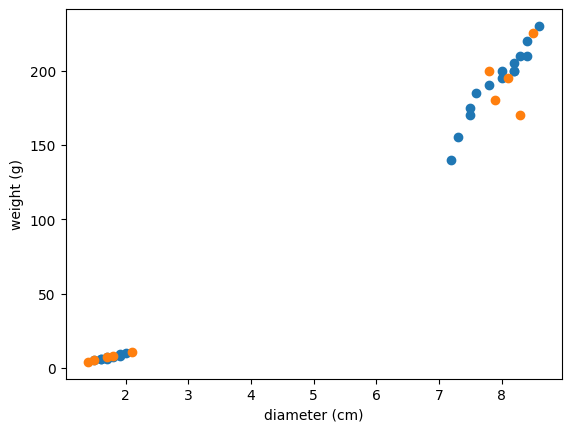

In [11]:
# 제대로 잘 랜덤분할 되었는지 산점도로 확인해보기 / 시각화로 검증하기
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('diameter (cm)')
plt.ylabel('weight (g)')
plt.show()

- 여기서 산점도를 그렸을 때 파란 점과 주황 점이 특정 구역에 몰려있지 않고 전체적으로 골고루 섞여서 나타나야 성공
- 만약 한쪽에만 몰려있다면 다시 섞어야 함

### 2-5. 두번째 머신러닝 프로그램

In [12]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # → 1.0

kn.predict(test_input)
test_target

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0])

- 이제 섞인 데이터로 다시 훈련하고, 한 번도 보지 못한 데이터(Test set)로 시험을 봤는데 여기서 높은 점수가 나와야 진또배기 실력의 모델이라는 것.